- Formar datos de train y test
- Formar resultados de XRNN en un dataframe con las fechas como index, la primera columna con los valores reales y las siguientes columnas con los resultados de cada modelo

|date(index) | real_value | xrnn_results | timesnet_results | ... | 
| --- | --- | --- | --- | --- |
|2022-12-01 | 0.5 | 0.4 | 0.3 | ... |
|2023-01-01 | 0.6 | 0.5 | 0.7 | ... |
|2023-02-01 | 0.5 | 0.5 | 0.5 | ... |

- Al generar resultados debería entregarse una serie de pandas con las fechas como index y los valores de las predicciones
- Con eso se puede agregar al dataframe de los resultados haciendo un join con el index

- Las predicciones deben ser desde la fecha siguiente al presente virtual, por lo que en TimesNet debería ser el primer punto de predicción
- Calcular métricas de resultados: MSE, MAE, MAPE, RMSE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
home_path_results = "/Users/francisco/Documents/GitHub/Time-Series-Library/results/"

In [3]:
datasets_path = "/home/francisco/Documents/Practica/Time-Series-Library/datasets/"

In [4]:
coffee_df  = pd.read_csv(datasets_path+ 'Coffee_500Exog.csv')
coffee_results_df=  pd.read_csv(datasets_path+ 'Coffee_500Exog_results.csv')
sugar_df  = pd.read_csv(datasets_path+ 'Sugar_500Exog.csv')
sugar_results_df =  pd.read_csv(datasets_path+ 'Sugar_500Exog_results.csv')


In [141]:
results_path = "/home/francisco/Documents/Practica/Time-Series-Library/results/long_term_forecast_coffee_TimesNet_custom_test_data.csv_bs128_lrtypeC_ftMS_sl52_ll26_pl52_dm128_nh8_el3_dl2_df64_fc3_ebfixed_dtTrue_Exp_0/"

In [142]:
pred = np.load(results_path+'pred.npy')
true = np.load(results_path+'true.npy')
dates = np.load(results_path+'dates.npy')

In [143]:
from datetime import datetime


In [144]:
preds = np.squeeze(pred)
trues = np.squeeze(true)
dates = np.squeeze(dates)

In [145]:
date_s = pd.Series(dates[16])
date = pd.to_datetime(date_s, format='%Y%m%d')

In [146]:
true_df = pd.DataFrame(trues[16])
pred_df = pd.DataFrame(preds[16])
date_df = date.to_frame()

In [147]:
times_df = pd.concat([date_df,true_df,pred_df],axis=1)
times_df.columns = ['date', 'true', 'times' ]
times_df.set_index('date',inplace=True)

In [148]:
xrnn = coffee_results_df.iloc[:,[0,3]]
xrnn.set_index('date',inplace=True)
xrnn.index = pd.to_datetime(xrnn.index)

In [149]:
total_df = times_df.join(xrnn,on='date')
total_df.columns = [ 'True', 'Times', 'Xrnn']

In [150]:
context = coffee_df.iloc[:,[0,2]]
context.set_index('date',inplace=True)
context.index = pd.to_datetime(context.index)

<Axes: xlabel='date'>

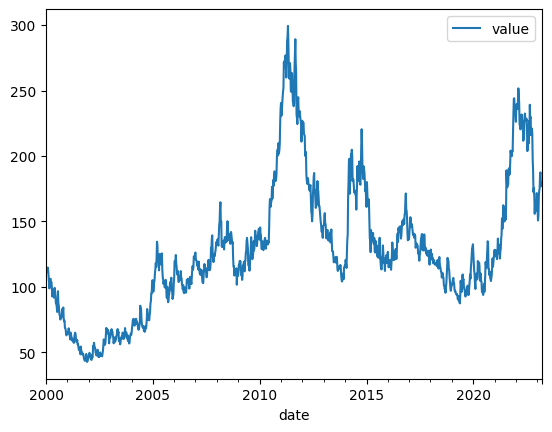

In [151]:
context.plot()

In [152]:
total_df.head()

,True,Times,Xrnn
date,,,
2022-04-04,228.400009,211.212784,239.861328
2022-04-11,231.650009,209.872818,238.145325
2022-04-18,223.599991,206.934677,244.713760
2022-04-25,227.299988,208.775589,244.073212
2022-05-02,222.549988,217.950119,239.707550


<Axes: xlabel='date'>

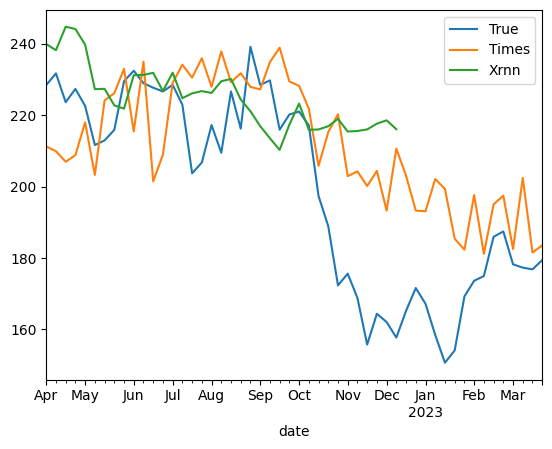

In [153]:
total_df.plot()

In [155]:
w_context =context.join(total_df, on='date')

In [156]:
from dateutil import relativedelta
from datetime import datetime
virtual_present = "2021-12-13"
virtual_present = datetime.strptime(virtual_present, "%Y-%m-%d")

test_start = virtual_present - relativedelta.relativedelta(weeks=52)

In [157]:
plot = w_context[w_context.index>test_start]

<Axes: xlabel='date'>

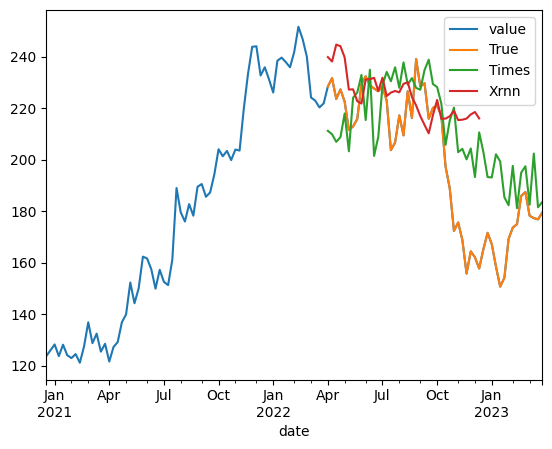

In [158]:
plot.plot()

<Axes: xlabel='date'>

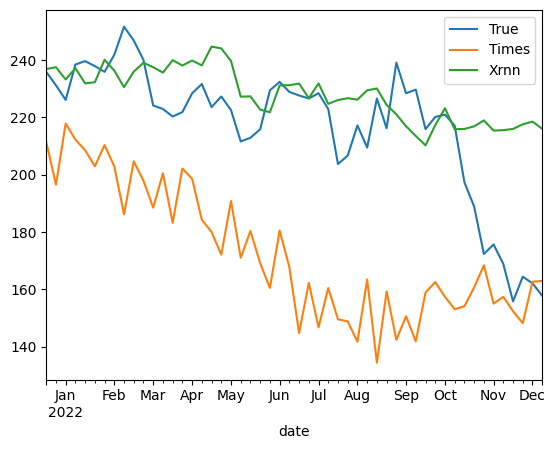

In [83]:
total_df.plot()

## Sugar


In [181]:
results_path_sugar= '/home/francisco/Documents/Practica/Time-Series-Library/results/long_term_forecast_coffee_DLinear_custom_sugar_test.csv_bs128_lrtypeC_ftMS_sl52_ll26_pl52_dm128_nh8_el3_dl2_df64_fc3_ebfixed_dtTrue_Exp_0/'

In [182]:
pred_sugar = np.load(results_path_sugar+'pred.npy')
true_sugar = np.load(results_path_sugar+'true.npy')
dates_sugar = np.load(results_path_sugar+'dates.npy')

In [183]:
preds_sugar = np.squeeze(pred_sugar)
trues_sugar = np.squeeze(true_sugar)
dates_sugar = np.squeeze(dates_sugar)

In [184]:
date_ss = pd.Series(dates_sugar[4])
date_sugar = pd.to_datetime(date_ss, format='%Y%m%d')

In [185]:
true_df_sugar = pd.DataFrame(trues_sugar[4])
pred_df_sugar = pd.DataFrame(preds_sugar[4])
date_df_sugar = date_sugar.to_frame()

In [186]:
times_df_sugar = pd.concat([date_df_sugar,true_df_sugar,pred_df_sugar],axis=1)
times_df_sugar.columns = ['date', 'true', 'times' ]
times_df_sugar.set_index('date',inplace=True)

In [187]:
xrnn_sugar = sugar_results_df.iloc[:,[0,3]]
xrnn_sugar.set_index('date',inplace=True)
xrnn_sugar.index = pd.to_datetime(xrnn_sugar.index)

In [188]:
total_df_sugar = times_df_sugar.join(xrnn_sugar,on='date')
total_df_sugar.columns = [ 'True', 'Times', 'Xrnn']

In [189]:
context_sugar = sugar_df.iloc[:,[0,2]]
context_sugar.set_index('date',inplace=True)
context_sugar.index = pd.to_datetime(context_sugar.index)

In [190]:
w_context_sugar =context_sugar.join(total_df_sugar, on='date')

In [191]:
virtual_present = '2022-04-04'
virtual_present = datetime.strptime(virtual_present, "%Y-%m-%d")

virtual_present = virtual_present - relativedelta.relativedelta(weeks=1)
test_start = virtual_present - relativedelta.relativedelta(weeks=52)

In [192]:
plot = w_context_sugar[w_context_sugar.index>test_start]

<Axes: xlabel='date'>

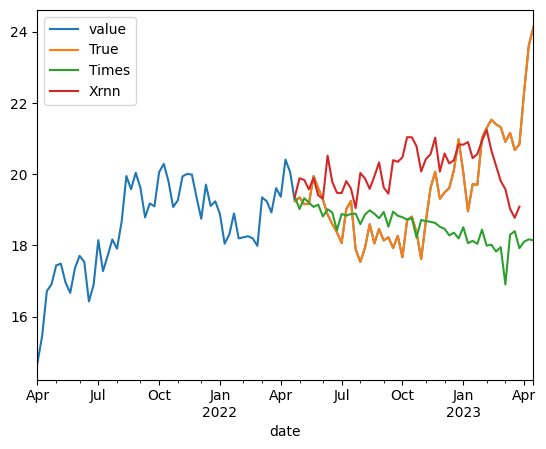

In [193]:
plot.plot()

<Axes: xlabel='date'>

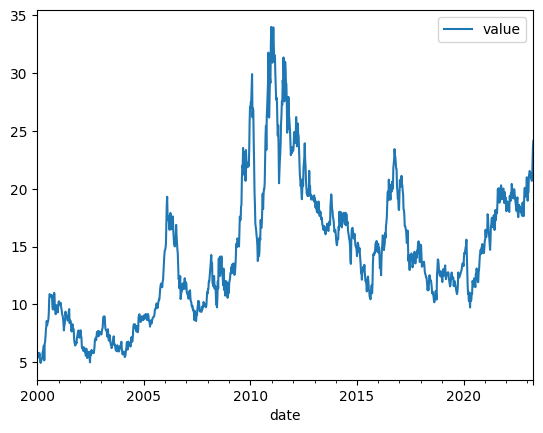

In [124]:
context_sugar.plot()

## Cafe- Azucar

In [127]:
cafe_az_path = '/home/francisco/Documents/Practica/Time-Series-Library/results/long_term_forecast_coffee_TimesNet_custom_test_data.csv_bs128_lrtypeC_ftMS_sl52_ll26_pl52_dm128_nh8_el3_dl2_df64_fc3_ebfixed_dtTrue_Exp_0/'


In [129]:
pred_2 = np.load(cafe_az_path+'pred.npy')
true_2 = np.load(cafe_az_path+'true.npy')
dates_2 = np.load(cafe_az_path+'dates.npy')

In [130]:
preds_2 = np.squeeze(pred_2)
trues_2 = np.squeeze(true_2)
dates_2 = np.squeeze(dates_2)

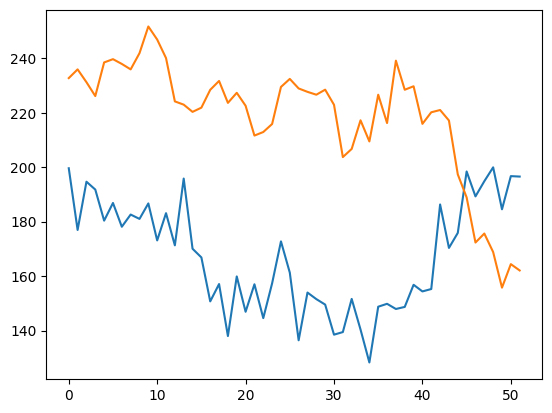

In [132]:
plt.plot(preds_2[0])
plt.plot(trues_2[0])

In [172]:
cafe_az_path = '/home/francisco/Documents/Practica/Time-Series-Library/results/long_term_forecast_coffee_TimesNet_custom_sugar_data.csv_bs128_lrtypeC_ftMS_sl52_ll26_pl52_dm128_nh8_el3_dl2_df64_fc3_ebfixed_dtTrue_Exp_0/'

In [173]:
pred_2 = np.load(cafe_az_path+'pred.npy')
true_2 = np.load(cafe_az_path+'true.npy')
dates_2 = np.load(cafe_az_path+'dates.npy')

In [174]:
preds_2 = np.squeeze(pred_2)
trues_2 = np.squeeze(true_2)
dates_2 = np.squeeze(dates_2)

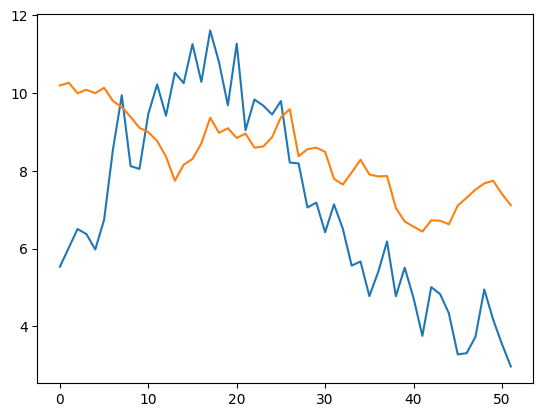

In [175]:
plt.plot(preds_2[0])
plt.plot(trues_2[0])

## Proximos experimentos

-Revisar las fechas y agregar parametro para guardar experimentes \
-Guardar metricas y generar funciones para cada experimento \
-Probar diferentes presentes virtuales (parametrizando) \ 
-Probar con mas datos \ 
-Revisar los hiperparametros(dmodel - factor) \
-Probar distintos modelos 
